# Air Quality

[Data Source](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/)  

The data is from a gas sensor array that was placed at ground level in a highly polluted section of an unnamed Italian city. 

Several sensors were used in the detection of various pollutants. All various forms of metal oxides [1](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3264469/)

From these many sensors the question is whether or not a model could be built to predict the true levels of carbon monoxide present in the environment without the use of a specific model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
air_quality = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', delimiter=';')

In [4]:
air_quality.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN


Just from looking at the first three rows present in the dataframe there are a few issues. The data for some of the columns has been recorded in the european style of commas instead of decimal points. This will cause them to appear as objects, rather than a float.  Additionally the last two columns contain no information. This will be confirmed with a look at the types of the columns.  
The info function is useful in that it shows the number of entries, how many contain a value, and what the type of that value is. They type is forced, meaning that an object and a float in the same column will default to an object. It is useful to find NaNs, but does have weaknesses. If non existent values were filled using a number like -9999, or any value it will not be counted. In order to be certain the data is as desired it will be worthwhile to go through a few more checks to make certain that the data is in the correct format and contains relevant information.

In [5]:
print air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB
None


From the dtypes listed Unnamed 15 and 16 columns can be dropped. This will leave the following data for analysis:

||Name|Explination|Data Type|
|-|-|-|-|
|1|Date|Date of Measurement DD/MM/YYYY|Datetime|
|2|Time|Time Measurement was Taken|Datetime|
|3|CO(GT)|Ground Truth Carbon Monoxide Presence| Float|
|4|PT08.S1(CO)| Tin Oxide Hourly Average Sensor Response - CO target|Float| 
|5|NMHC(GT)|Ground Truth Hourly Average Non Metanic Hydrocarbons(NMHC)|Float|
|6|C6H6(GT)|Ground Truth Benzene|Float|
|7|PT08.S2(NMHC)|Titania sensor response - NMHC Targeted|Float|
|8|NOx(GT)|Ground Truth Nitrogen Dioxide|Float|
|9|PT08.S3(NOx)|Tungsten Oxide Nitrogen Oxides Targeted|Float|
|10|NO2(GT)|Ground Truth Nitrogen Dioxide|Float|
|11|PT08.S4(NO2)|Tungsten Oxide Response Nitrogen Dioxide Targeted|Float
|12|PT08.S5(O3)|Indium Oxide Response Ozone Targeted|Float| 
|13|T|Temperature (°C)|Float|
|14|RH|Relative Humidity|Float|
|15|AH|Absolute Humidity|Float|


Ground truth specifies that this reading was the true value, taken from a reference certified analytic device that was placed in the vincinity of the sensor array. The units for all ground truth readings were in $\frac{mg}{m^3}$. 

Measurements were taken each hour. The experiment ran for a little more than a year, starting March 10th, 2004 to April 4th, 2005

Non-existent values were given the value of -200. These will be replaced by NaNs for further analysis.

Create a mask to remove the unnamed columns. 

In [6]:
mask = [x for x in air_quality.columns if x not in ["Unnamed: 15", "Unnamed: 16"]]

In [7]:
air = air_quality[mask]

Now to remove all NaNs that occupy entire rows and also replace values of -200 with NaN

In [9]:
air = air.dropna(how='all')
air.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [10]:
for column in air.columns:
    air[column] = air[column].apply(lambda x: np.NaN 
                                    if x == '-200' or x == -200 # If item is present as string or integer
                                    else x)
    
    # Commas present only as string, before converting to numeric replace with decimals
    air[column] = air[column].apply(lambda x: x.replace(',','.') if type(x)==str else x)

In [11]:
to_nums =[x for x in air.columns if x not in ['Date', 'Time']]

In [12]:
air[to_nums] = air[to_nums].applymap(float)

In [31]:
air.Date = pd.to_datetime(air.Date)

In [35]:
air_ = air.dropna(how='any')

In [36]:
air_.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1226,2004-04-30,20,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
1227,2004-04-30,21,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
1228,2004-04-30,22,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
1229,2004-04-30,23,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422
1230,2004-01-05,0,3.5,1425.0,275.0,15.2,1155.0,185.0,709.0,110.0,1936.0,1789.0,17.8,66.8,1.3460


For the desired analysis, will need to remove the present ground truths for all of the chemical species except for carbon monoxide.  
To hone it down even further a correlation plot can s

In [37]:
co_analysis = ['Time', 'CO(GT)','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)',
               'PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']

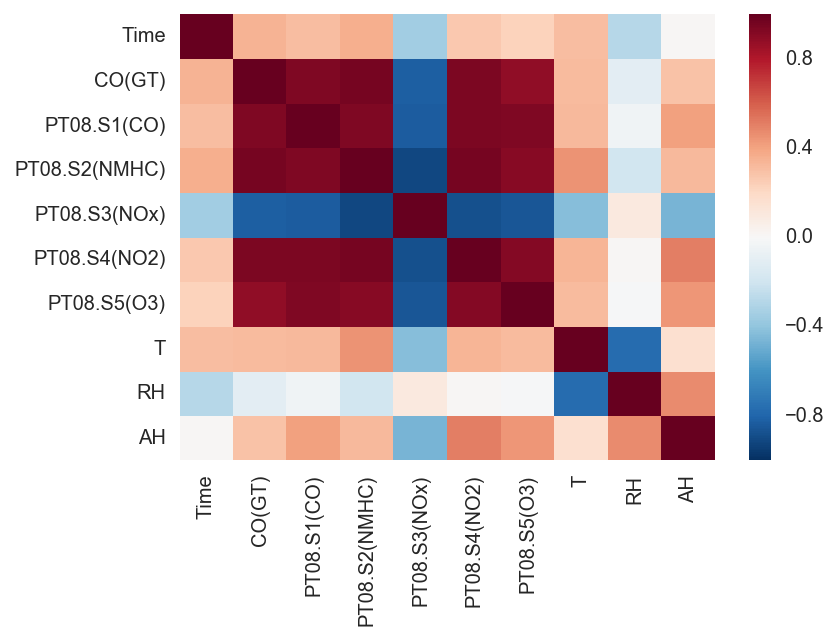

In [39]:
sns.heatmap(air_[co_analysis].corr())
plt.show()

It would appear that there is a strong correlation between the Carbon Monoxide levels and the sensors for all of the available species, all positive, except for the nitrogen oxide species which are negatively correlated. Time and absolute humidity have a weak correlation and the relative humidity does not appear to have any effect on the carbon monoxide levels.  
A pairplot with a regression focus helps confirm the assumption 

In [43]:
sensors = [sensor for sensor in sensors if sensor not in ['Time', 'T', 'RH']]

In [44]:
sensors

['CO(GT)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'AH']

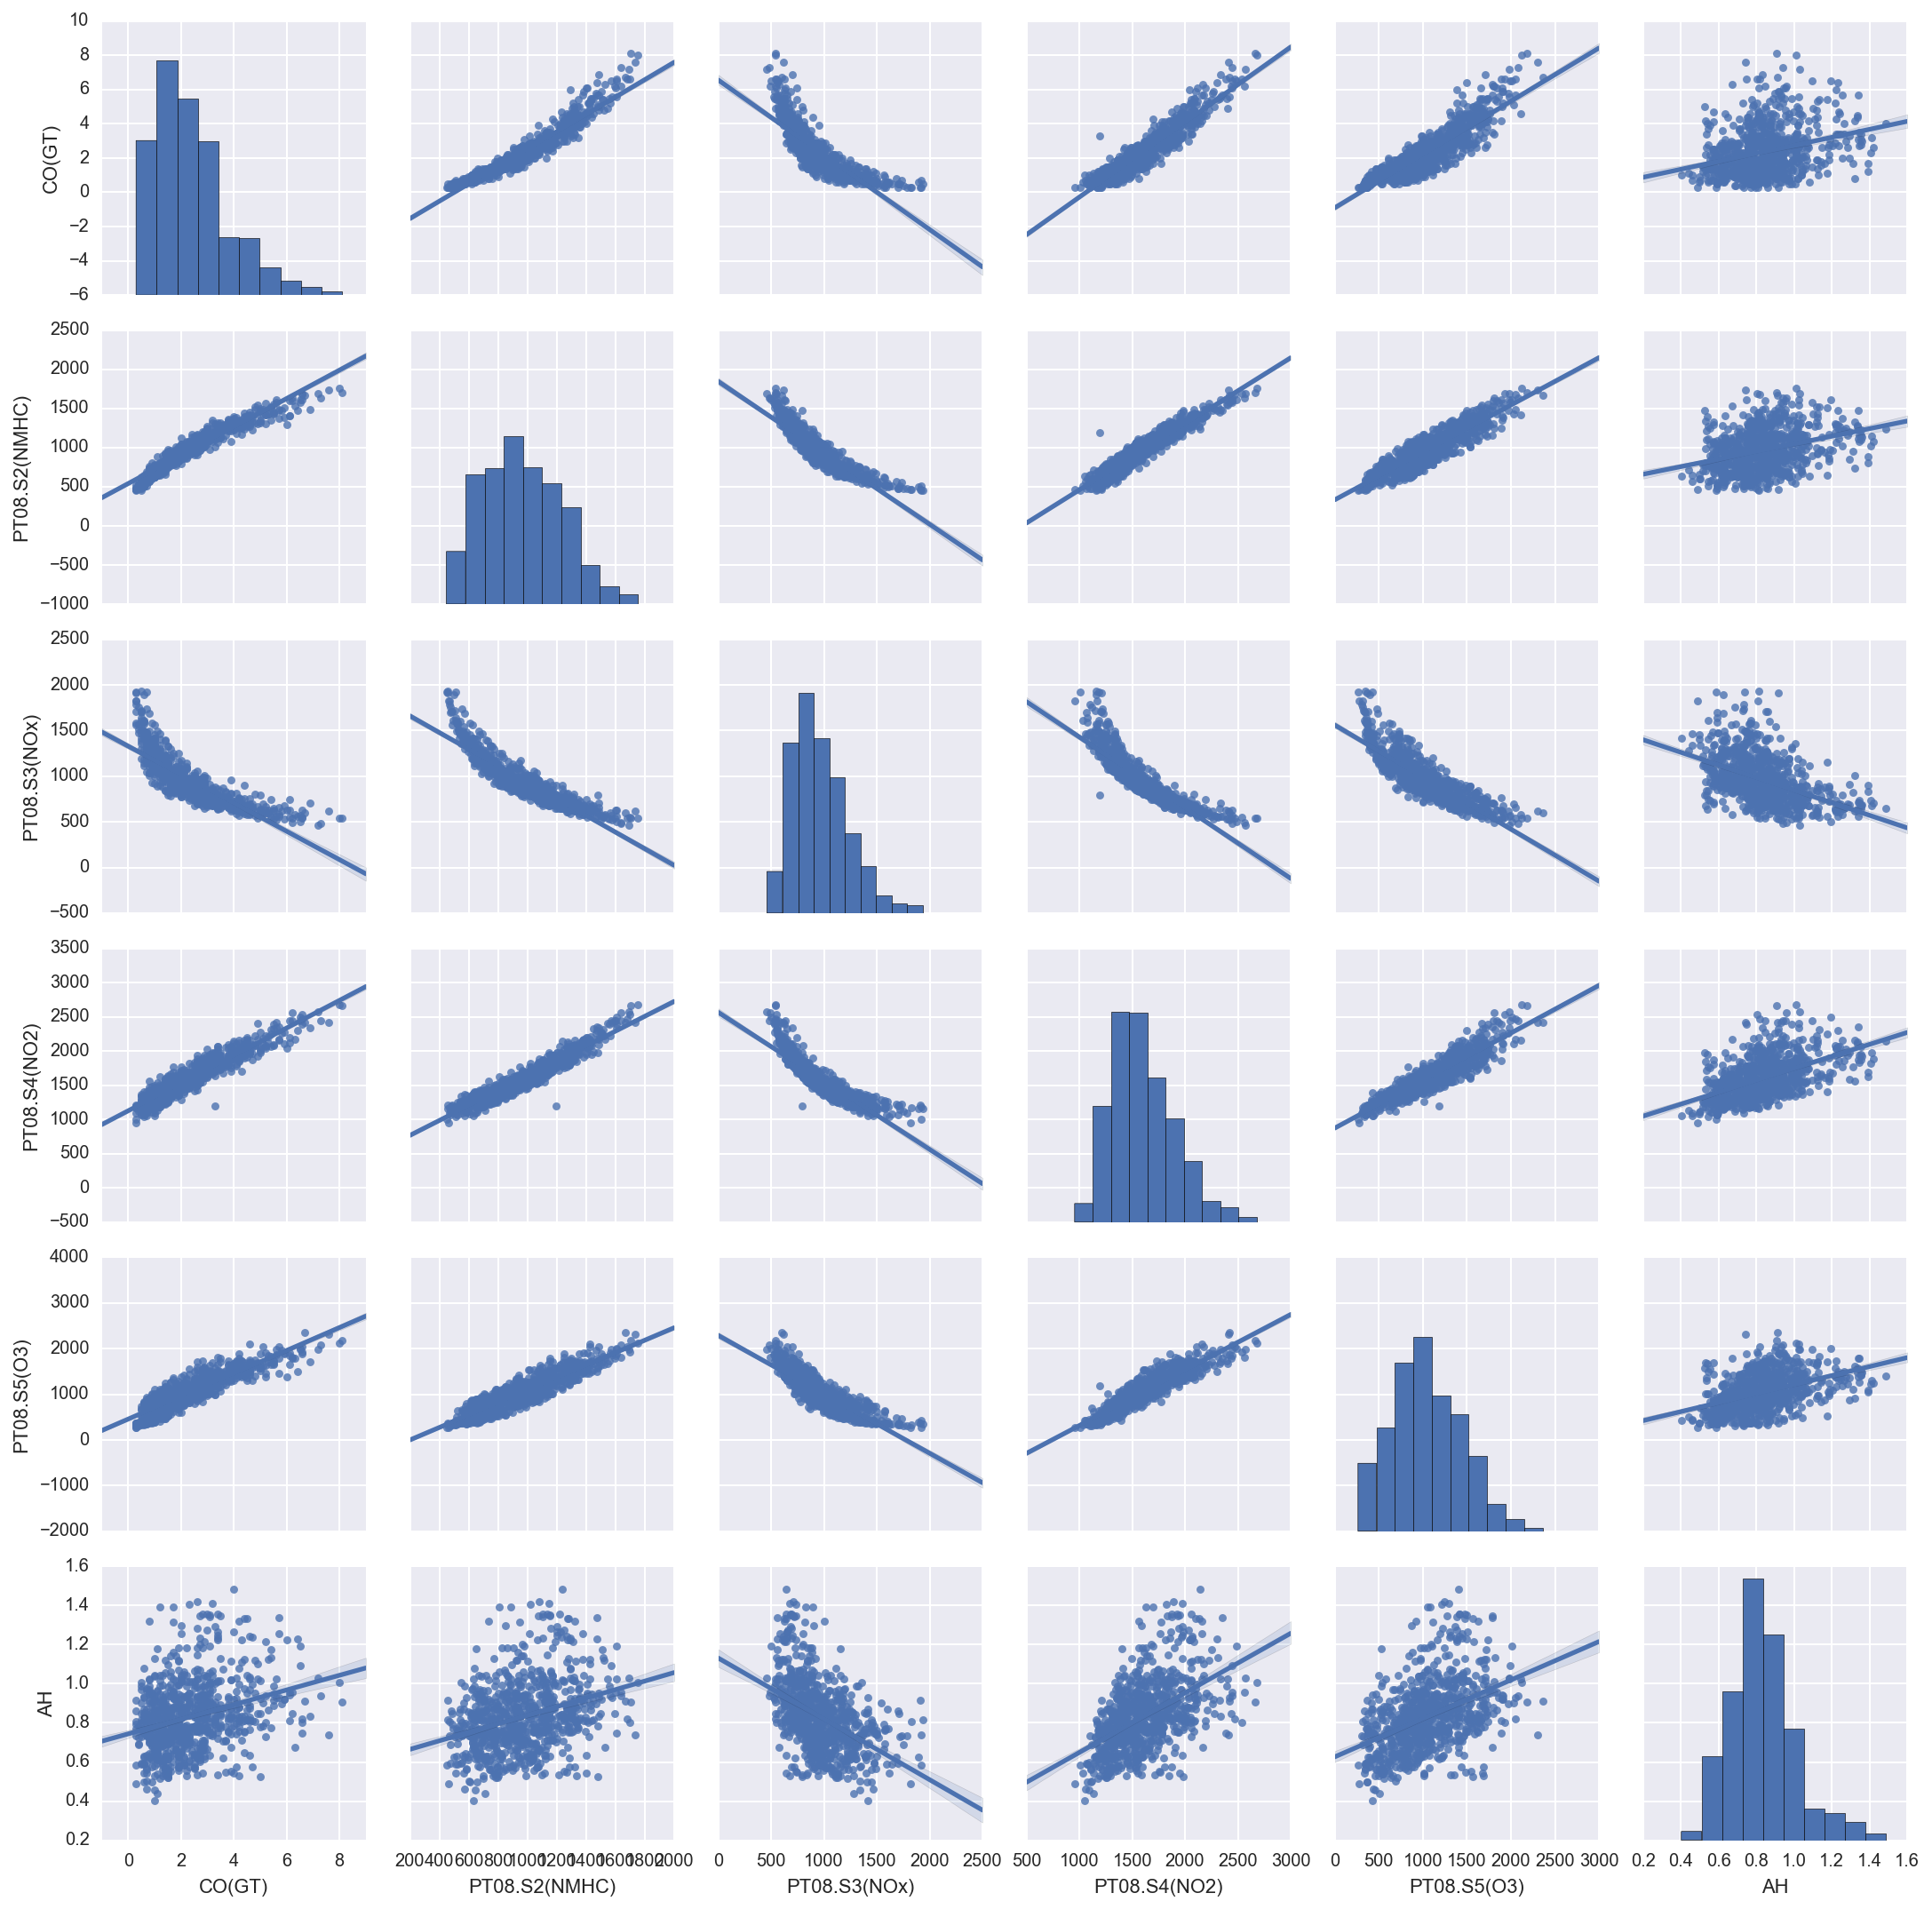

In [46]:
sns.pairplot(air_[sensors], kind='reg')
plt.show()

From above it would appear that the NOx species relative to carbon monoxide has a non linear appearance. 

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

Y = air_['CO(GT)']
X = air_[sensors]

In [54]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=11)

In [55]:
lin_reg = LinearRegression()

In [57]:
lin_reg.fit(X_train, Y_train)

/Users/sebozek/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
y_pred = lin_reg.predict(x_test)

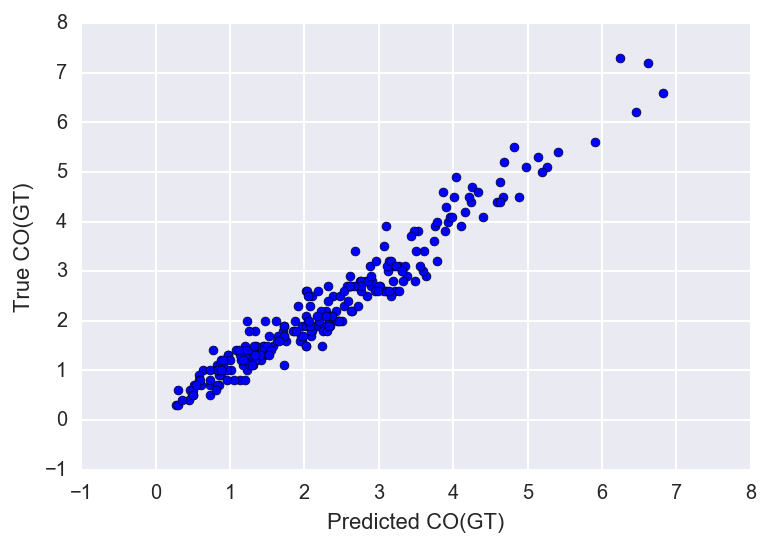

In [64]:
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted CO(GT)")
plt.ylabel("True CO(GT)")
plt.show()

In [72]:
lin_reg.score(x_test, y_test)

0.94328457772764951

There's a certain degree of distrust that goes into any $r^2$ value that exceeds 0.9. It likely will be a high variance model, that will fall apart with the introduction of new data. Although no new data can be gathered relative to this experiment, there are certainly a few things that cause me to be a little less suspicious about this. 

In [68]:
X_train2, x_test2, Y_train2, y_test2 = train_test_split(X, Y, test_size = 0.3, random_state=22)

In [69]:
lin_reg.score(x_test2, y_test2)

0.93702144994620384

In [70]:
X_train3, x_test3, Y_train3, y_test3 = train_test_split(X, Y, test_size = 0.3, random_state=33)

In [71]:
lin_reg.score(x_test3, y_test3)

0.93849603369010171